## Initialize connection to data

This project aims to create two machine learning models to accurately identify whether network connections in the given data sets are either malicious or non-malicious

In [2]:
import pandas as pd
column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level']) #according to https://github.com/Wahch/projetIDS/blob/main/ProjetIDS.ipynb
data = pd.read_csv("KDDTrain+.txt", names=column_names)
data
#mask = data['State'].isnull()
#data[mask]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


## Exploring the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [12]:
data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


This selects all data related to attacks

In [5]:
attacks = (data['attack'] != 'normal')
attack_data = data[attacks]
attack_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,19
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125958,0,tcp,private,S0,0,0,0,0,0,0,...,0.02,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
125964,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
125966,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune,20


This is data related to non-malicious network activity

In [6]:
normal = (data['attack'] == 'normal')
normal_data = data[normal]
normal_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
12,0,tcp,http,SF,287,2251,0,0,0,0,...,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125965,0,tcp,smtp,SF,2233,365,0,0,0,0,...,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,normal,19
125967,0,tcp,http,SF,359,375,0,0,0,0,...,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,normal,18
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18


In order to get a better understanding of what needs to happen, we need to consider what data to map. In the code directly below, I am sorting the data out into different variables to use for later so I can better understand how to use it.

Lets explore the data we have to find which variables we don't need to keep

## Data Hygiene ##

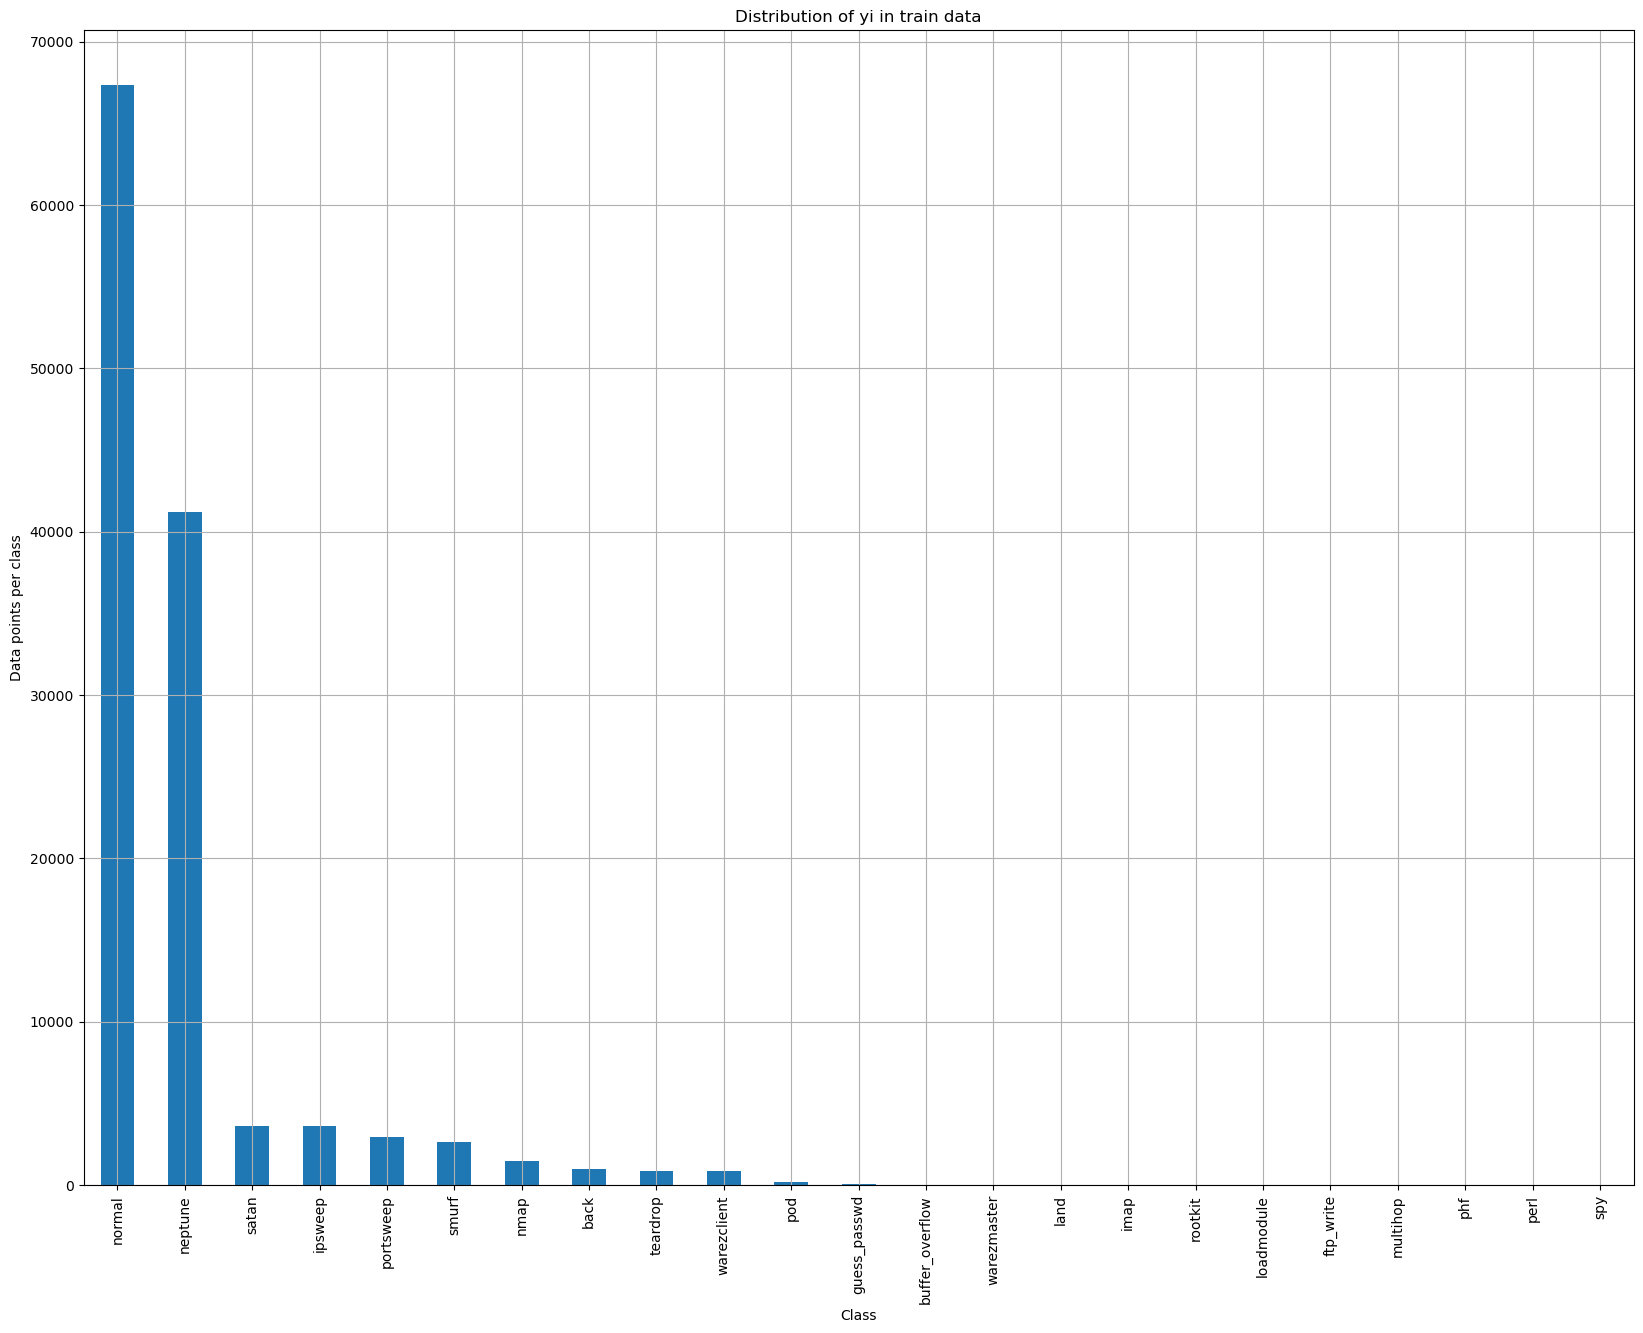

number of data poijnts in class dist 1 : 67343 ( 53.458 %)
number of data poijnts in class dist 2 : 41214 ( 32.717 %)
number of data poijnts in class dist 3 : 3633 ( 2.884 %)
number of data poijnts in class dist 4 : 3599 ( 2.857 %)
number of data poijnts in class dist 5 : 2931 ( 2.327 %)
number of data poijnts in class dist 6 : 2646 ( 2.1 %)
number of data poijnts in class dist 7 : 1493 ( 1.185 %)
number of data poijnts in class dist 8 : 956 ( 0.759 %)
number of data poijnts in class dist 9 : 892 ( 0.708 %)
number of data poijnts in class dist 10 : 890 ( 0.707 %)
number of data poijnts in class dist 11 : 201 ( 0.16 %)
number of data poijnts in class dist 12 : 53 ( 0.042 %)
number of data poijnts in class dist 13 : 30 ( 0.024 %)
number of data poijnts in class dist 14 : 20 ( 0.016 %)
number of data poijnts in class dist 15 : 18 ( 0.014 %)
number of data poijnts in class dist 16 : 11 ( 0.009 %)
number of data poijnts in class dist 17 : 10 ( 0.008 %)
number of data poijnts in class dist 1

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(20,15))
class_dist = data['attack'].value_counts()
class_dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()
sorted_yi = np.argsort(-class_dist.values)
for i in sorted_yi:
    print('number of data poijnts in class dist', i+1, ':',class_dist.values[i], '(', np.round((class_dist.values[i]/data.shape[0]*100), 3), '%)')

# The above graph shows that the majority of the data set refers to normal network connections. Therefore, we need to remove this bias towards normal connections so as to more accurately identify the other scenarios #

This can be achieved by changing the weighting of classes so that when the model is trained it will take this inbalance into account

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
trialdata = data.select_dtypes(include=['object'])
simpleattack = (data['attack'] != 'normal')
simpleconn = (data['attack'] == 'normal')
attack_data = data[simpleattack]
normal_data = data[simpleconn]
purenumbers = data.select_dtypes(exclude=['object'])
simpleattack
#purenumbers
#trialdata

0         False
1         False
2          True
3         False
4         False
          ...  
125968     True
125969    False
125970    False
125971     True
125972    False
Name: attack, Length: 125973, dtype: bool

below is one-hot encoding of the categorical parts of the raw data

In [28]:
categorical_columns = ['protocol_type', 'service', 'flag']
df_encoded = pd.get_dummies(data, columns=categorical_columns)
df_encoded = df_encoded.drop(columns=['attack'])
print(df_encoded)

        duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        491          0     0               0       0    0   
1              0        146          0     0               0       0    0   
2              0          0          0     0               0       0    0   
3              0        232       8153     0               0       0    0   
4              0        199        420     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
125968         0          0          0     0               0       0    0   
125969         8        105        145     0               0       0    0   
125970         0       2231        384     0               0       0    0   
125971         0          0          0     0               0       0    0   
125972         0        151          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0  

Our data has now been processed. The following is true:
- The categorical data columns protocol_type, service and flag have been converted to true and false values
- All data has been scaled
- The attack column has been dropped

In [30]:
from sklearn.preprocessing import StandardScaler
combined_data = pd.concat([purenumbers, df_encoded], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)
print(scaled_data)

[[-0.11024922 -0.0076786  -0.00491864 ... -0.01972622  0.82515007
  -0.04643159]
 [-0.11024922 -0.00773737 -0.00491864 ... -0.01972622  0.82515007
  -0.04643159]
 [-0.11024922 -0.00776224 -0.00491864 ... -0.01972622 -1.21190076
  -0.04643159]
 ...
 [-0.11024922 -0.00738219 -0.00482315 ... -0.01972622  0.82515007
  -0.04643159]
 [-0.11024922 -0.00776224 -0.00491864 ... -0.01972622 -1.21190076
  -0.04643159]
 [-0.11024922 -0.00773652 -0.00491864 ... -0.01972622  0.82515007
  -0.04643159]]


We want our y axis to define whether or not a connection is malicious or not. We can do this by allocating a 1 or 0 for each connection: 1 meaning malicious, 0 meaning non-malicious

In [31]:
x = scaled_data
y = simpleattack

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((94479, 164), (31494, 164), (94479,), (31494,))

In [33]:
import pandas as pd
data['is_malicious'] = (data['attack'] != 'normal').astype(int)
class_counts = data['is_malicious'].value_counts()
weight_for_false = class_counts.sum() / (2 * class_counts[0])
wieght_for_true = class_counts.sum() / (2 * class_counts[1])


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
model = RandomForestClassifier(class_weight={0: weight_for_false, 1: wieght_for_true})
model2 = KNeighborsClassifier()

In [35]:
model.fit(x_train, y_train)
model2.fit(x_train, y_train)

KNeighborsClassifier()

In [36]:
x_val

array([[-0.11024922, -0.00771812, -0.00482017, ..., -0.01972622,
         0.82515007, -0.04643159],
       [-0.11024922, -0.00772817, -0.00470304, ..., -0.01972622,
         0.82515007, -0.04643159],
       [-0.11024922, -0.00776224, -0.00491864, ..., -0.01972622,
        -1.21190076, -0.04643159],
       ...,
       [-0.11024922, -0.00775458, -0.00489999, ..., -0.01972622,
         0.82515007, -0.04643159],
       [-0.11024922, -0.00772374, -0.00482141, ..., -0.01972622,
         0.82515007, -0.04643159],
       [ 1.97920734, -0.00773737, -0.00489253, ..., -0.01972622,
         0.82515007, -0.04643159]])

In [38]:
model.score(x_train, y_train)
model2.score(x_train, y_train)

1.0

In [39]:
y.value_counts()

False    67343
True     58630
Name: attack, dtype: int64

In [40]:
model.score(x_val, y_val)
model2.score(x_val, y_val)

0.9992697021654918

We want to create a confusion matrix to see whether this data model is correct

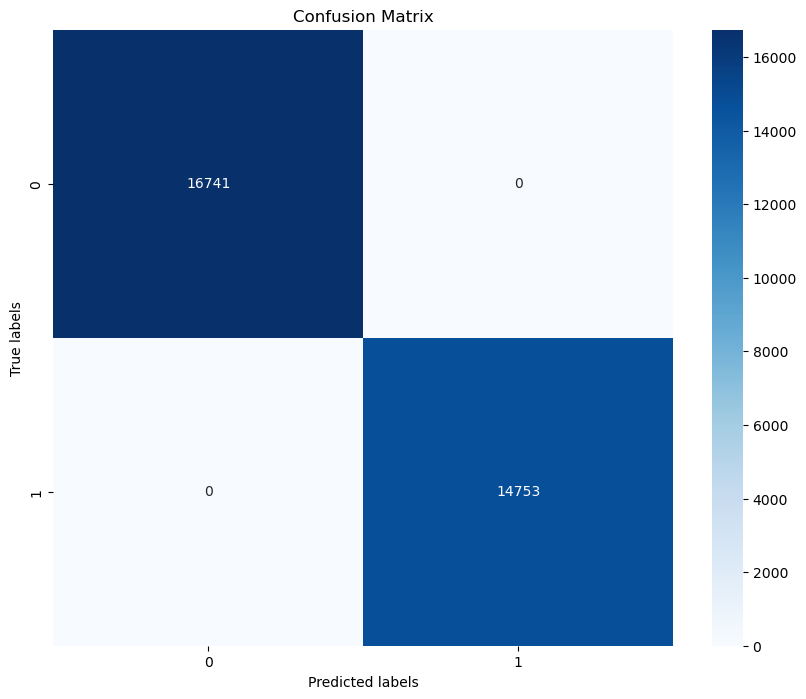

In [42]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_val)
y_pred_2 = model2.predict(x_val)
cm2 = confusion_matrix(y_val, y_pred_2)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
#sns.heatmap(variance_df, annot=True, cmap='Accent')
#plt.title('Feature Variance')
#plt.show()
#variance_df
#x_test

Hyperparameter tuning

Got the best accuracy for KNeighbours with 1 neighbour and leaf size at 1.
Our KNeighbour model needs to be tweaked. It is believed that the model overfits!

In [28]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
#i = 0
#knn = KNeighborsClassifier(n_neighbors=i)
kf = KFold(n_splits=5, shuffle=True, random_state=52)
#scores = cross_val_score(knn, x_train, y_train, cv=kf, scoring='accuracy')
#print("Cross-Validation Scores:", scores)
#print("Mean Accuracy:", scores.mean())
best_accuracy = 0
best_k = 0

for k in range(1, 11):  # Try different values of n_neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=kf, scoring='accuracy')
    mean_accuracy = scores.mean()

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k

print("Best K:", best_k)
print("Best Accuracy:", best_accuracy)

In [15]:
from sklearn.model_selection import GridSearchCV
hyperparam = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]}
#hyperparam2 = {"n_neighbors": [5], "algorithm": ['auto'], "leaf_size": [30], "weights": ['uniform', 'distance']}
gridsearch = GridSearchCV(estimator=model, param_grid=hyperparam, cv=5, scoring="accuracy", n_jobs =-1)
#gridsearch2 = GridSearchCV(estimator=model2, param_grid=hyperparam2, cv=5, scoring="accuracy", n_jobs =-1)
gridsearch.fit(x_train, y_train)
#gridsearch2.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [17]:
#bestparameters2 = gridsearch2.best_params_
#print("Best hyperparameters:", bestparameters2)
#tuned_model2 = gridsearch2.best_estimator_
#tuned_model2.score(x_test, y_test)
bestparameters = gridsearch.best_params_
print("Best hyperparameter:", bestparameters)
tuned_model = gridsearch.best_estimator_
tuned_model.score(x_val, y_val)

Best hyperparameter: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


0.9995237188035816

When we test our models, we must ensure that the data is passed through the model in the exact same format as what it was tested on

In [18]:
import pandas as pd
column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level']) #according to https://github.com/Wahch/projetIDS/blob/main/ProjetIDS.ipynb
test = pd.read_csv("KDDTest+.txt", names=column_names)
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [19]:
purenumbers = test.select_dtypes(exclude=['object'])
categorical_columns = ['protocol_type','service','flag']
df_encoded = pd.get_dummies(test, columns=categorical_columns)
df_encoded = df_encoded.drop(columns=['attack'])
combined_data = pd.concat([purenumbers, df_encoded], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)
x = scaled_data
y = (test['attack'] != 'normal')

In [44]:
model.score(x,y)
#tuned_model2.score(x,y)

1.0

In [45]:
model2.score(x,y)

0.9994443253713097

As you can see, the model is now way more accurate, and produces a very close to perfect test result

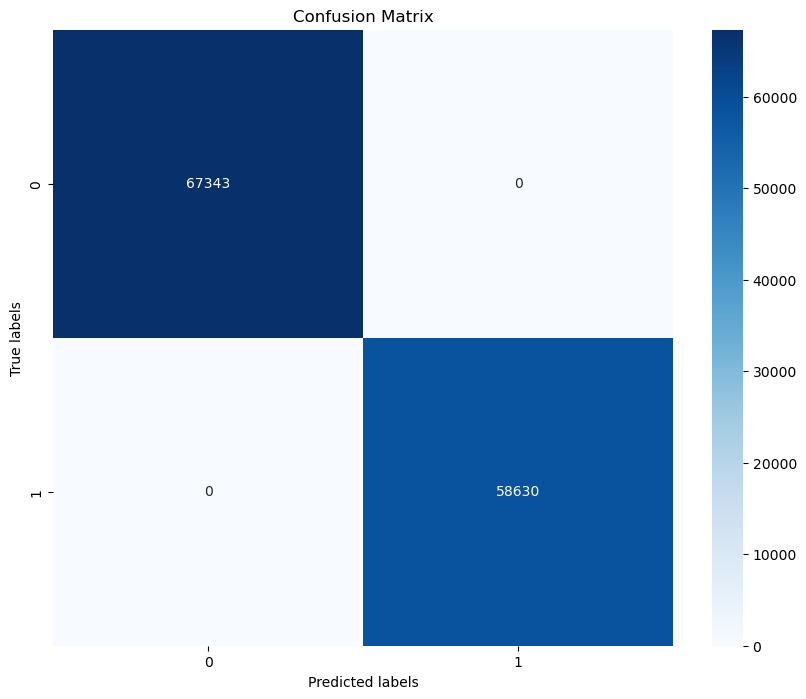

In [48]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x)
#y_pred_2 = model2.predict(x)
cm = confusion_matrix(y_pred, y)
#cm2 = confusion_matrix(y_pred_2, y)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#sns.heatmap(cm2, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [1]:
import pickle
#saving trained model to file
pickle.dump(tuned_model, open("random_forest_model.pkl", "wb"))


NameError: name 'tuned_model' is not defined

In order to adjust the number of clusters we're using, we can check using the following algorithms

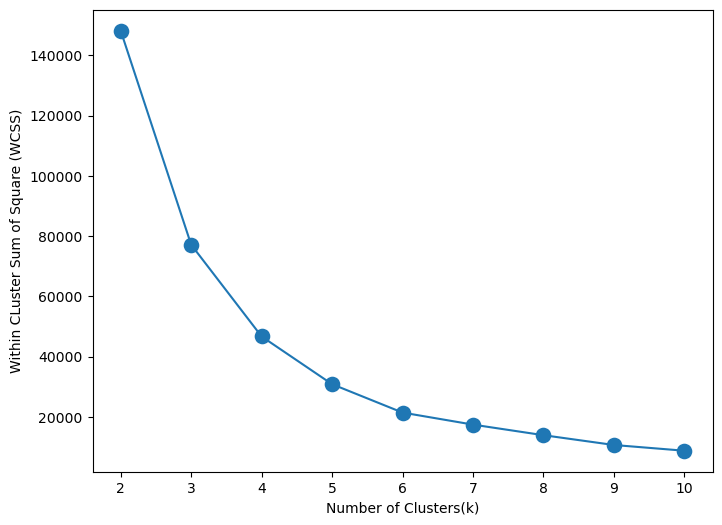

In [34]:
# THE WITHIN CLUSTER SUM OF SQUARES (WCSS)
wcss=[]
for k in range(2,11):
    km = KMeans(n_clusters = k, n_init =25, random_state =1234)
    km.fit(purenumbers_scaled)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8,6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters(k)',
    ylabel = 'Within CLuster Sum of Square (WCSS)')

## Average Silhouette Score

In [35]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    #insert scaled data to check
    km.fit(purenumbers_scaled)
    silhouette.append(silhouette_score(purenumbers_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

KeyboardInterrupt: 

## Calinski Harabasz Score

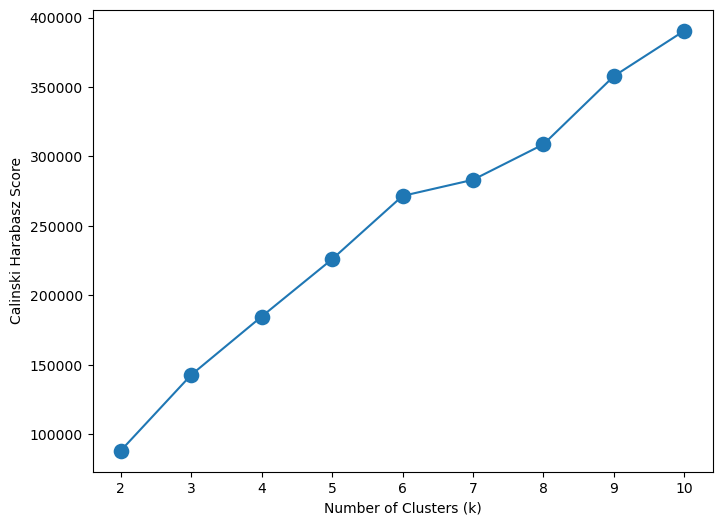

In [36]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    #insert scaled data to check
    km.fit(purenumbers_scaled)
    calinski.append(calinski_harabasz_score(purenumbers_scaled, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')